# Examining Elementla Ratios to Investigate Silicate vs Carbonate Weathering associated with the Lake Jackson Sinkhole

### Purpose:
Negrel et al. (1993) proposes a mixing model to determine carbonate vs silicate weathering in the Congo River based on elemental ratios, notably Mg/Na and Ca/Na.  This idea is being explored for all of the Lake Jackson Samples to see if there is a similar relationship associated with the Sinkhole

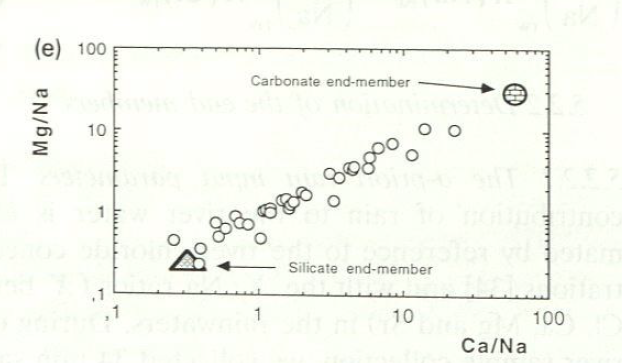

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML


In [2]:
wq_df = pd.read_csv('../data/MasterWaterQuality.csv', parse_dates=['Sampling time'],
                        index_col='Sampling time', squeeze=True)
well_df=pd.read_csv('../data/processed/Well2021.csv', parse_dates=['Datetime'],
                        index_col='Datetime', squeeze=True)

In [3]:
wq_df['Mg/Na']=wq_df['Magnesium']/wq_df['Sodium']
wq_df['Ca/Na']=wq_df['Calcium']/wq_df['Sodium']




In [4]:
LJ=wq_df.loc[wq_df['Location'] == 'Porter Sink']
FW=wq_df.loc[wq_df['Location'] == 'FSU Well']
WS=wq_df.loc[wq_df['Location'] == 'Wakulla Springs']
SW=wq_df.loc[wq_df['Location'] == 'Sally Ward Spring']

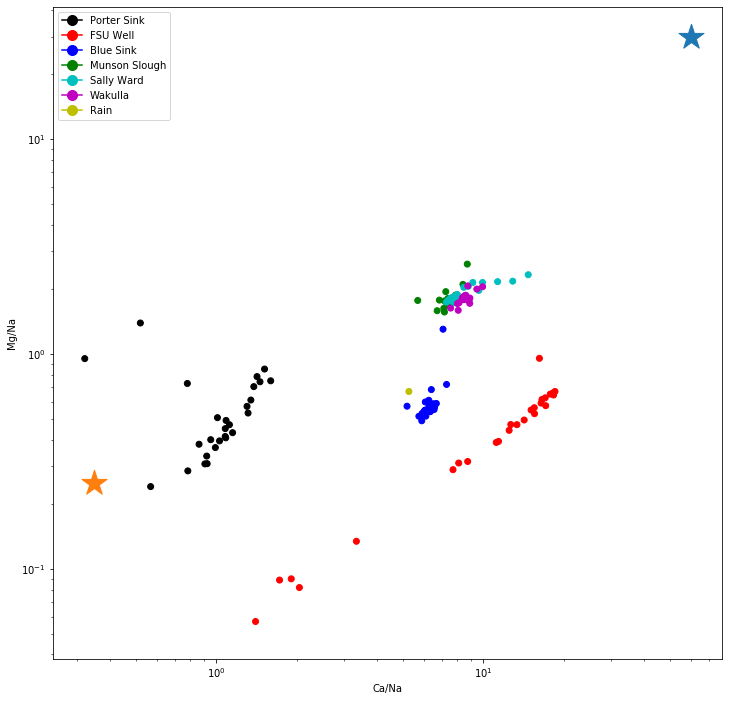

In [5]:
fig, ax = plt.subplots(1,1, figsize=(12,12))

ax.scatter(x=wq_df['Ca/Na'], y=wq_df['Mg/Na'], c=wq_df['color'])
ax.set_xlabel('Ca/Na')
ax.set_ylabel('Mg/Na')
#Carbonate End Member
ax.scatter(x=60, y=30, marker='*', s=700)
#Silicate End Member
ax.scatter(x=0.35, y=0.25, marker='*', s=700)
ax.set_yscale('log')
ax.set_xscale('log')

legend_elements = [Line2D([0], [0], marker='o', color='k', label='Porter Sink', markersize=10),
                   Line2D([0], [0], marker='o', color='r', label='FSU Well',  markersize=10),
                   Line2D([0], [0], marker='o', color='b', label='Blue Sink', markersize=10),
                   Line2D([0], [0], marker='o', color='g', label='Munson Slough', markersize=10),
                   Line2D([0], [0], marker='o', color='c', label='Sally Ward',markersize=10),
                   Line2D([0], [0], marker='o', color='m', label='Wakulla', markersize=10),
                   Line2D([0], [0], marker='o', color='y', label='Rain', markersize=10)]
            
                   

ax.legend(handles=legend_elements)

### Interpretation
Initial observation shows that the samples largely deviate from the line drawn between the Silicate Endmemebr (orange star bottom left) and the carbonate end member (Blue Star Top Right). The model was used in surface water and may have trouble applying this to groundwater levels, for reasons unknown to me.  The error bars on the endmembers are also failry large and may explain some of the discrepancy.  Endmembers are also a global estiamtions, local Hawthorn and local St Marks Limestone may have different ratios  

#### Things that seem significant
1) All of the points gerneally follow a linear pattern that matches the slope of the end members. 

2) The springs are closest to the Carbonate end member and Lake Jackson is closest to the Silicate Endmember

3) The FSU well has the most variation and is VERY linear with a similar slope to the endmember line

## To Do Next: Plot the Hysteresis/Time Series of the FSU Well Ratios

### FSU Well Plot with Sample ID Labels

First Samples (right after lake draining) at bottom Left (silicate side) and migrate up to top right (carbonate) with time

Converted log-log axes to linear to spread the points out a little bit more to see better when zoomed in.  Relationship is still pretty linear regardless

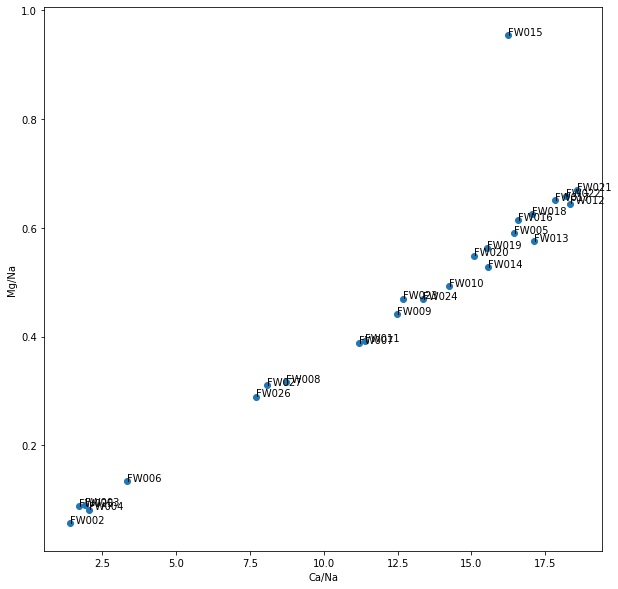

In [7]:
Well=FW.to_numpy()

fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.scatter(x=Well[:,19], y=Well[:,18])
ax.set_xlabel('Ca/Na')
ax.set_ylabel('Mg/Na')


#Carbonate End Member
#ax.scatter(x=60, y=30, marker='*', s=700)
#Silicate End Member
#ax.scatter(x=0.35, y=0.25, marker='*', s=700)

#ax.set_yscale('log')
#ax.set_xscale('log')

for idx, row in FW.iterrows():
    ax.annotate(row['ID'], (row['Ca/Na'], row['Mg/Na']) )

## Animation
#### Step through one at a time with arrow key to see how the points move. 

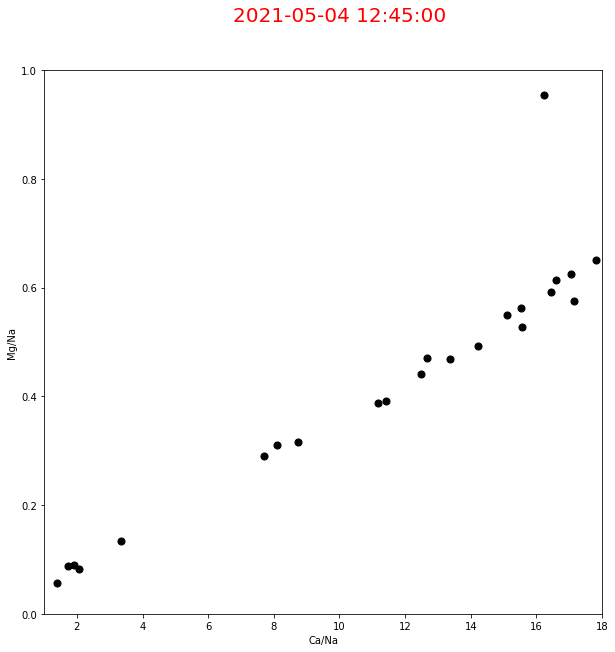

In [23]:
Well=FW.to_numpy()

fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.set_xlabel('Ca/Na')
ax.set_ylabel('Mg/Na')
ax.set_xlim(1, 18)
ax.set_ylim(0, 1)
label = ax.text(10, 1.1, FW.index[0], ha='center', va='center', fontsize=20, color="Red")

def animation(i):
    ax.scatter(Well[i,19], Well[i,18], s=50, c='k')
    label.set_text(FW.index[i])


ani = FuncAnimation(fig, animation, interval=1000, frames=27)
HTML(ani.to_jshtml())

#Unsure why a sedond plot is added. May be a Jupyter Notebook issue


## Interpretation
The points start at the Silicate side, migrate towards carbonate, move back towards silicate, thhen back to carbonate.

I interpret this as the Initial sinkhole water hitting the well (silicate from Hawthhorn). The sinkhole basin is exposed and draining less water to the aquifer, thus primarily Aquifer water hitting the well.  The sinkhole is temporarily plugged, then drains again, allowing a lot of lake water to weather Hawthorn and shift back towards the silicate side.  I will wokr on this later to add labels/dates to the animation

### Sinkhole Lake-Pulse Concept
Largest changes are the "pulses" of Lake water when the sinkhole initially drains the lake [sinkhole basin].  When the sinkhole is exposed to the air, less water is going down the hole and has less impact on aquifer chemistry.